# Importing The Dataset

> Add blockquote



In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# metadata
print(chronic_kidney_disease.metadata)

# variable information
print(chronic_kidney_disease.variables)


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

# Importing the Required Libraries

In [3]:
import pandas as pd  # A library for data processing and analysis, including managing DataFrames
import numpy as np  # A package for numerical operations and handling arrays or matrices
import matplotlib.pyplot as plt  # Used to generate static visualizations and charts
import seaborn as sns  # Provides enhanced, aesthetically pleasing plots built on top of Matplotlib
import math  # Supplies standard mathematical functions (e.g., logarithms, factorials, trigonometry)
from sklearn.preprocessing import LabelEncoder  # Converts categorical data into numerical form
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel  # Chooses features based on importance as determined by a model
from sklearn.model_selection import train_test_split  # Divides the dataset into training and testing subsets
from sklearn.preprocessing import MinMaxScaler  # Scales features to a defined range (e.g., 0 to 1)
from sklearn.model_selection import GridSearchCV  # Tunes hyperparameters via cross-validation techniques
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  # Assesses model performance using various metrics
from sklearn.neural_network import MLPClassifier  # Imports the Multi-Layer Perceptron classifier for neural network modeling
from sklearn.svm import SVC


# Dataset Exploaration

>




In [4]:
# Concatenate features (X) and target (y) into one dataframe
combined_data = pd.concat([X, y], axis=1)

# Creating a dictionary to map short names to full names
column_names = {
    'age': 'Age',
    'bp': 'Blood Pressure',
    'sg': 'Specific Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red Blood Cells',
    'pc': 'Pus Cell',
    'pcc': 'Pus Cell Clumps',
    'ba': 'Bacteria',
    'bgr': 'Blood Glucose Random',
    'bu': 'Blood Urea',
    'sc': 'Serum Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed Cell Volume',
    'wbcc': 'White Blood Cell Count',
    'rbcc': 'Red Blood Cell Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes Mellitus',
    'cad': 'Coronary Artery Disease',
    'appet': 'Appetite',
    'pe': 'Pedal Edema',
    'ane': 'Anemia',
    'class': 'Chronic Kidney Disease'
}

# Renaming columns in the dataframe
combined_data.rename(columns=column_names, inplace=True)

# Display the combined dataframe
combined_data.head()


,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [5]:
combined_data.describe()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [6]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

# Missing Values Analysis

In [7]:
combined_data.isnull().sum()

,0
Age,9
Blood Pressure,12
Specific Gravity,47
Albumin,46
Sugar,49
Red Blood Cells,152
Pus Cell,65
Pus Cell Clumps,4
Bacteria,4
Blood Glucose Random,44


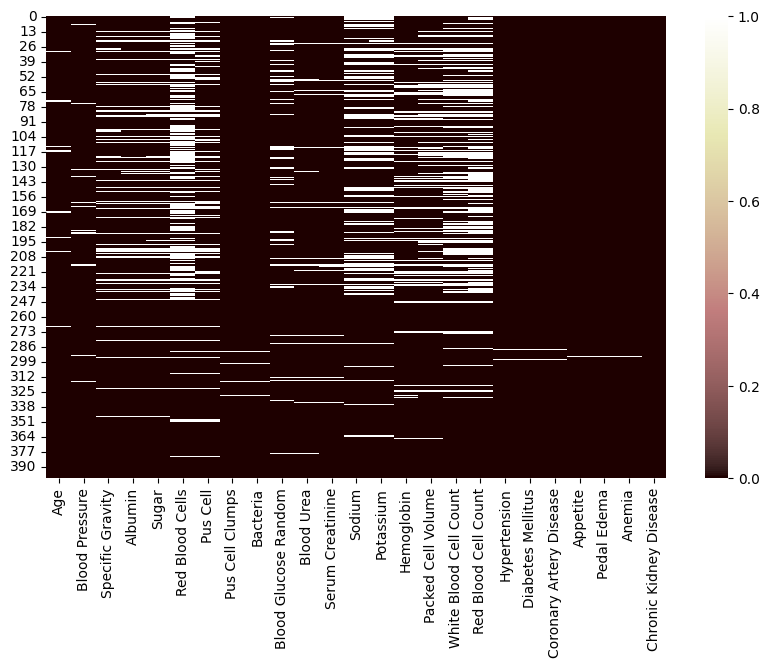

In [8]:
# Plotting a heatmap to show missing values with a custom color scheme
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data.isnull(), cmap="pink", cbar=True)
plt.show()

In [9]:
# Fill missing numerical values with the mean
numerical_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns
combined_data[numerical_cols] = combined_data[numerical_cols].apply(lambda col: col.fillna(col.mean()), axis=0)

# Fill missing categorical values with the mode
categorical_cols = combined_data.select_dtypes(include=['object', 'category']).columns
combined_data[categorical_cols] = combined_data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]), axis=0)

# Display the updated DataFrame
print("Data after filling missing values:")
print(combined_data)


Data after filling missing values:
      Age  Blood Pressure  Specific Gravity  Albumin  Sugar Red Blood Cells  \
0    48.0            80.0             1.020      1.0    0.0          normal   
1     7.0            50.0             1.020      4.0    0.0          normal   
2    62.0            80.0             1.010      2.0    3.0          normal   
3    48.0            70.0             1.005      4.0    0.0          normal   
4    51.0            80.0             1.010      2.0    0.0          normal   
..    ...             ...               ...      ...    ...             ...   
395  55.0            80.0             1.020      0.0    0.0          normal   
396  42.0            70.0             1.025      0.0    0.0          normal   
397  12.0            80.0             1.020      0.0    0.0          normal   
398  17.0            60.0             1.025      0.0    0.0          normal   
399  58.0            80.0             1.025      0.0    0.0          normal   

     Pus Cell Pu

# Data Cleaning

In [10]:
# Identify categorical columns
categorical_cols = combined_data.select_dtypes(include=['object', 'category']).columns

# Display unique values in each categorical column
for col in categorical_cols:
    unique_values = combined_data[col].unique()
    print(f"Column '{col}' has the following unique values: {unique_values}")


Column 'Red Blood Cells' has the following unique values: ['normal' 'abnormal']
Column 'Pus Cell' has the following unique values: ['normal' 'abnormal']
Column 'Pus Cell Clumps' has the following unique values: ['notpresent' 'present']
Column 'Bacteria' has the following unique values: ['notpresent' 'present']
Column 'Hypertension' has the following unique values: ['yes' 'no']
Column 'Diabetes Mellitus' has the following unique values: ['yes' 'no' '\tno']
Column 'Coronary Artery Disease' has the following unique values: ['no' 'yes']
Column 'Appetite' has the following unique values: ['good' 'poor']
Column 'Pedal Edema' has the following unique values: ['no' 'yes']
Column 'Anemia' has the following unique values: ['no' 'yes']
Column 'Chronic Kidney Disease' has the following unique values: ['ckd' 'ckd\t' 'notckd']


In [11]:
# Fix specific inconsistencies
combined_data['Diabetes Mellitus'] = combined_data['Diabetes Mellitus'].replace({'\tno': 'no'})
combined_data['Chronic Kidney Disease'] = combined_data['Chronic Kidney Disease'].replace({'ckd\t': 'ckd'})

# Verify the changes by printing unique values for each categorical column
for col in combined_data.select_dtypes(include=['object', 'category']).columns:
    unique_values = combined_data[col].unique()
    print(f"Cleaned unique values in column '{col}': {unique_values}")


Cleaned unique values in column 'Red Blood Cells': ['normal' 'abnormal']
Cleaned unique values in column 'Pus Cell': ['normal' 'abnormal']
Cleaned unique values in column 'Pus Cell Clumps': ['notpresent' 'present']
Cleaned unique values in column 'Bacteria': ['notpresent' 'present']
Cleaned unique values in column 'Hypertension': ['yes' 'no']
Cleaned unique values in column 'Diabetes Mellitus': ['yes' 'no']
Cleaned unique values in column 'Coronary Artery Disease': ['no' 'yes']
Cleaned unique values in column 'Appetite': ['good' 'poor']
Cleaned unique values in column 'Pedal Edema': ['no' 'yes']
Cleaned unique values in column 'Anemia': ['no' 'yes']
Cleaned unique values in column 'Chronic Kidney Disease': ['ckd' 'notckd']


# Categorical Values  Check in Each Columns

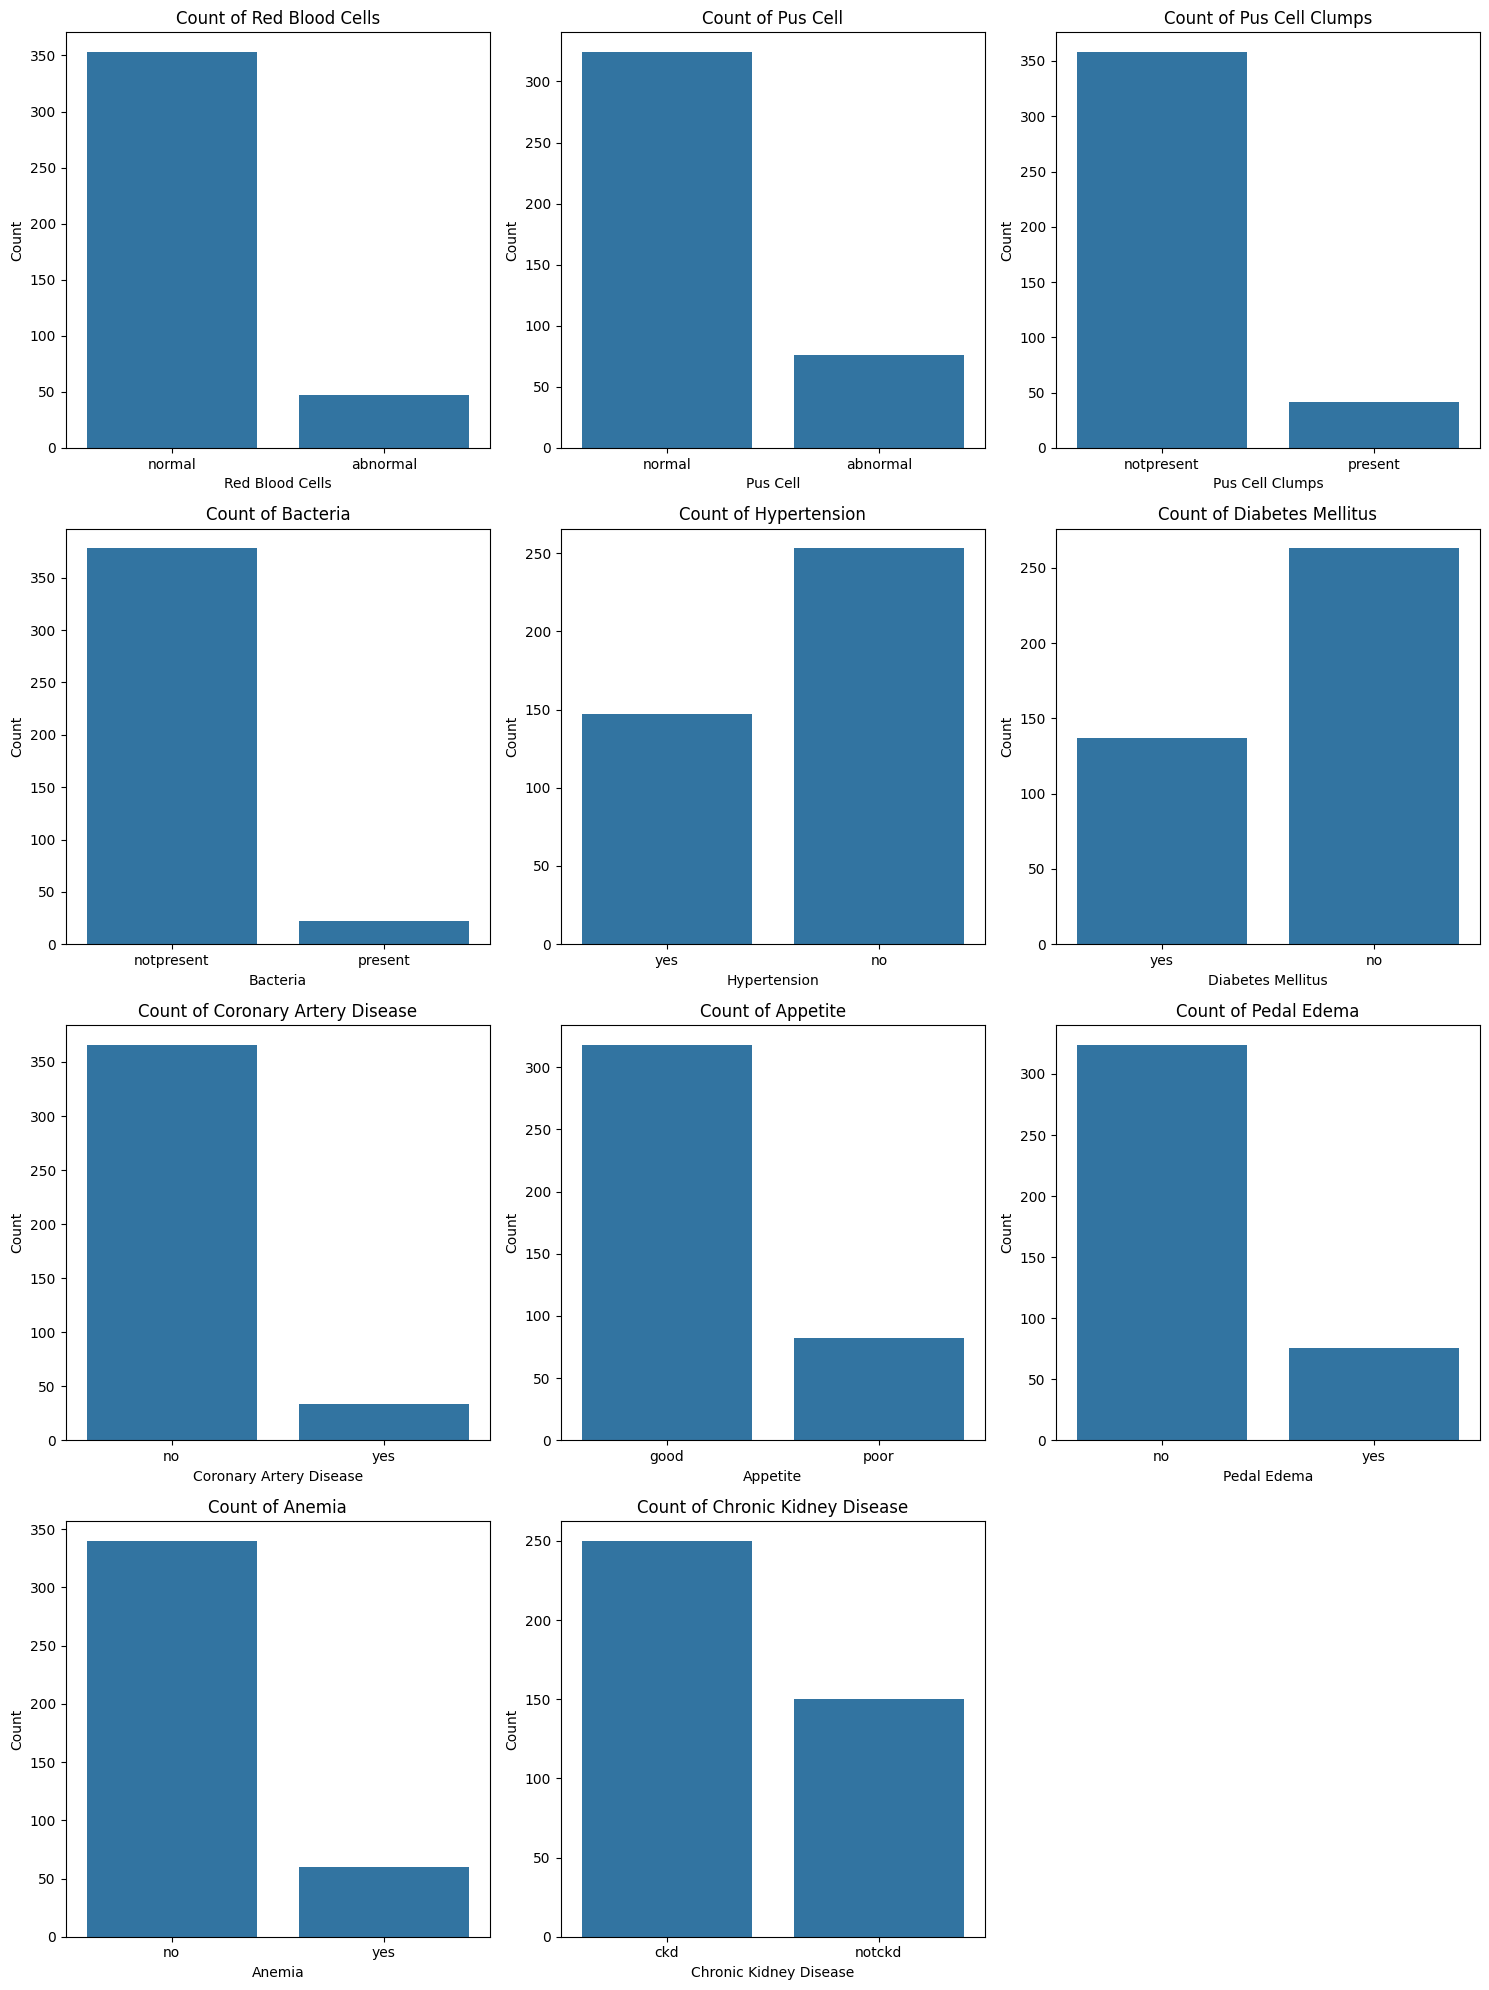

In [12]:
# Extracting categorical columns
categorical_columns = combined_data.select_dtypes(include=['object']).columns

# Plotting count distribution for each categorical column
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)  # Adjust grid based on the number of categorical columns
    sns.countplot(data=combined_data, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


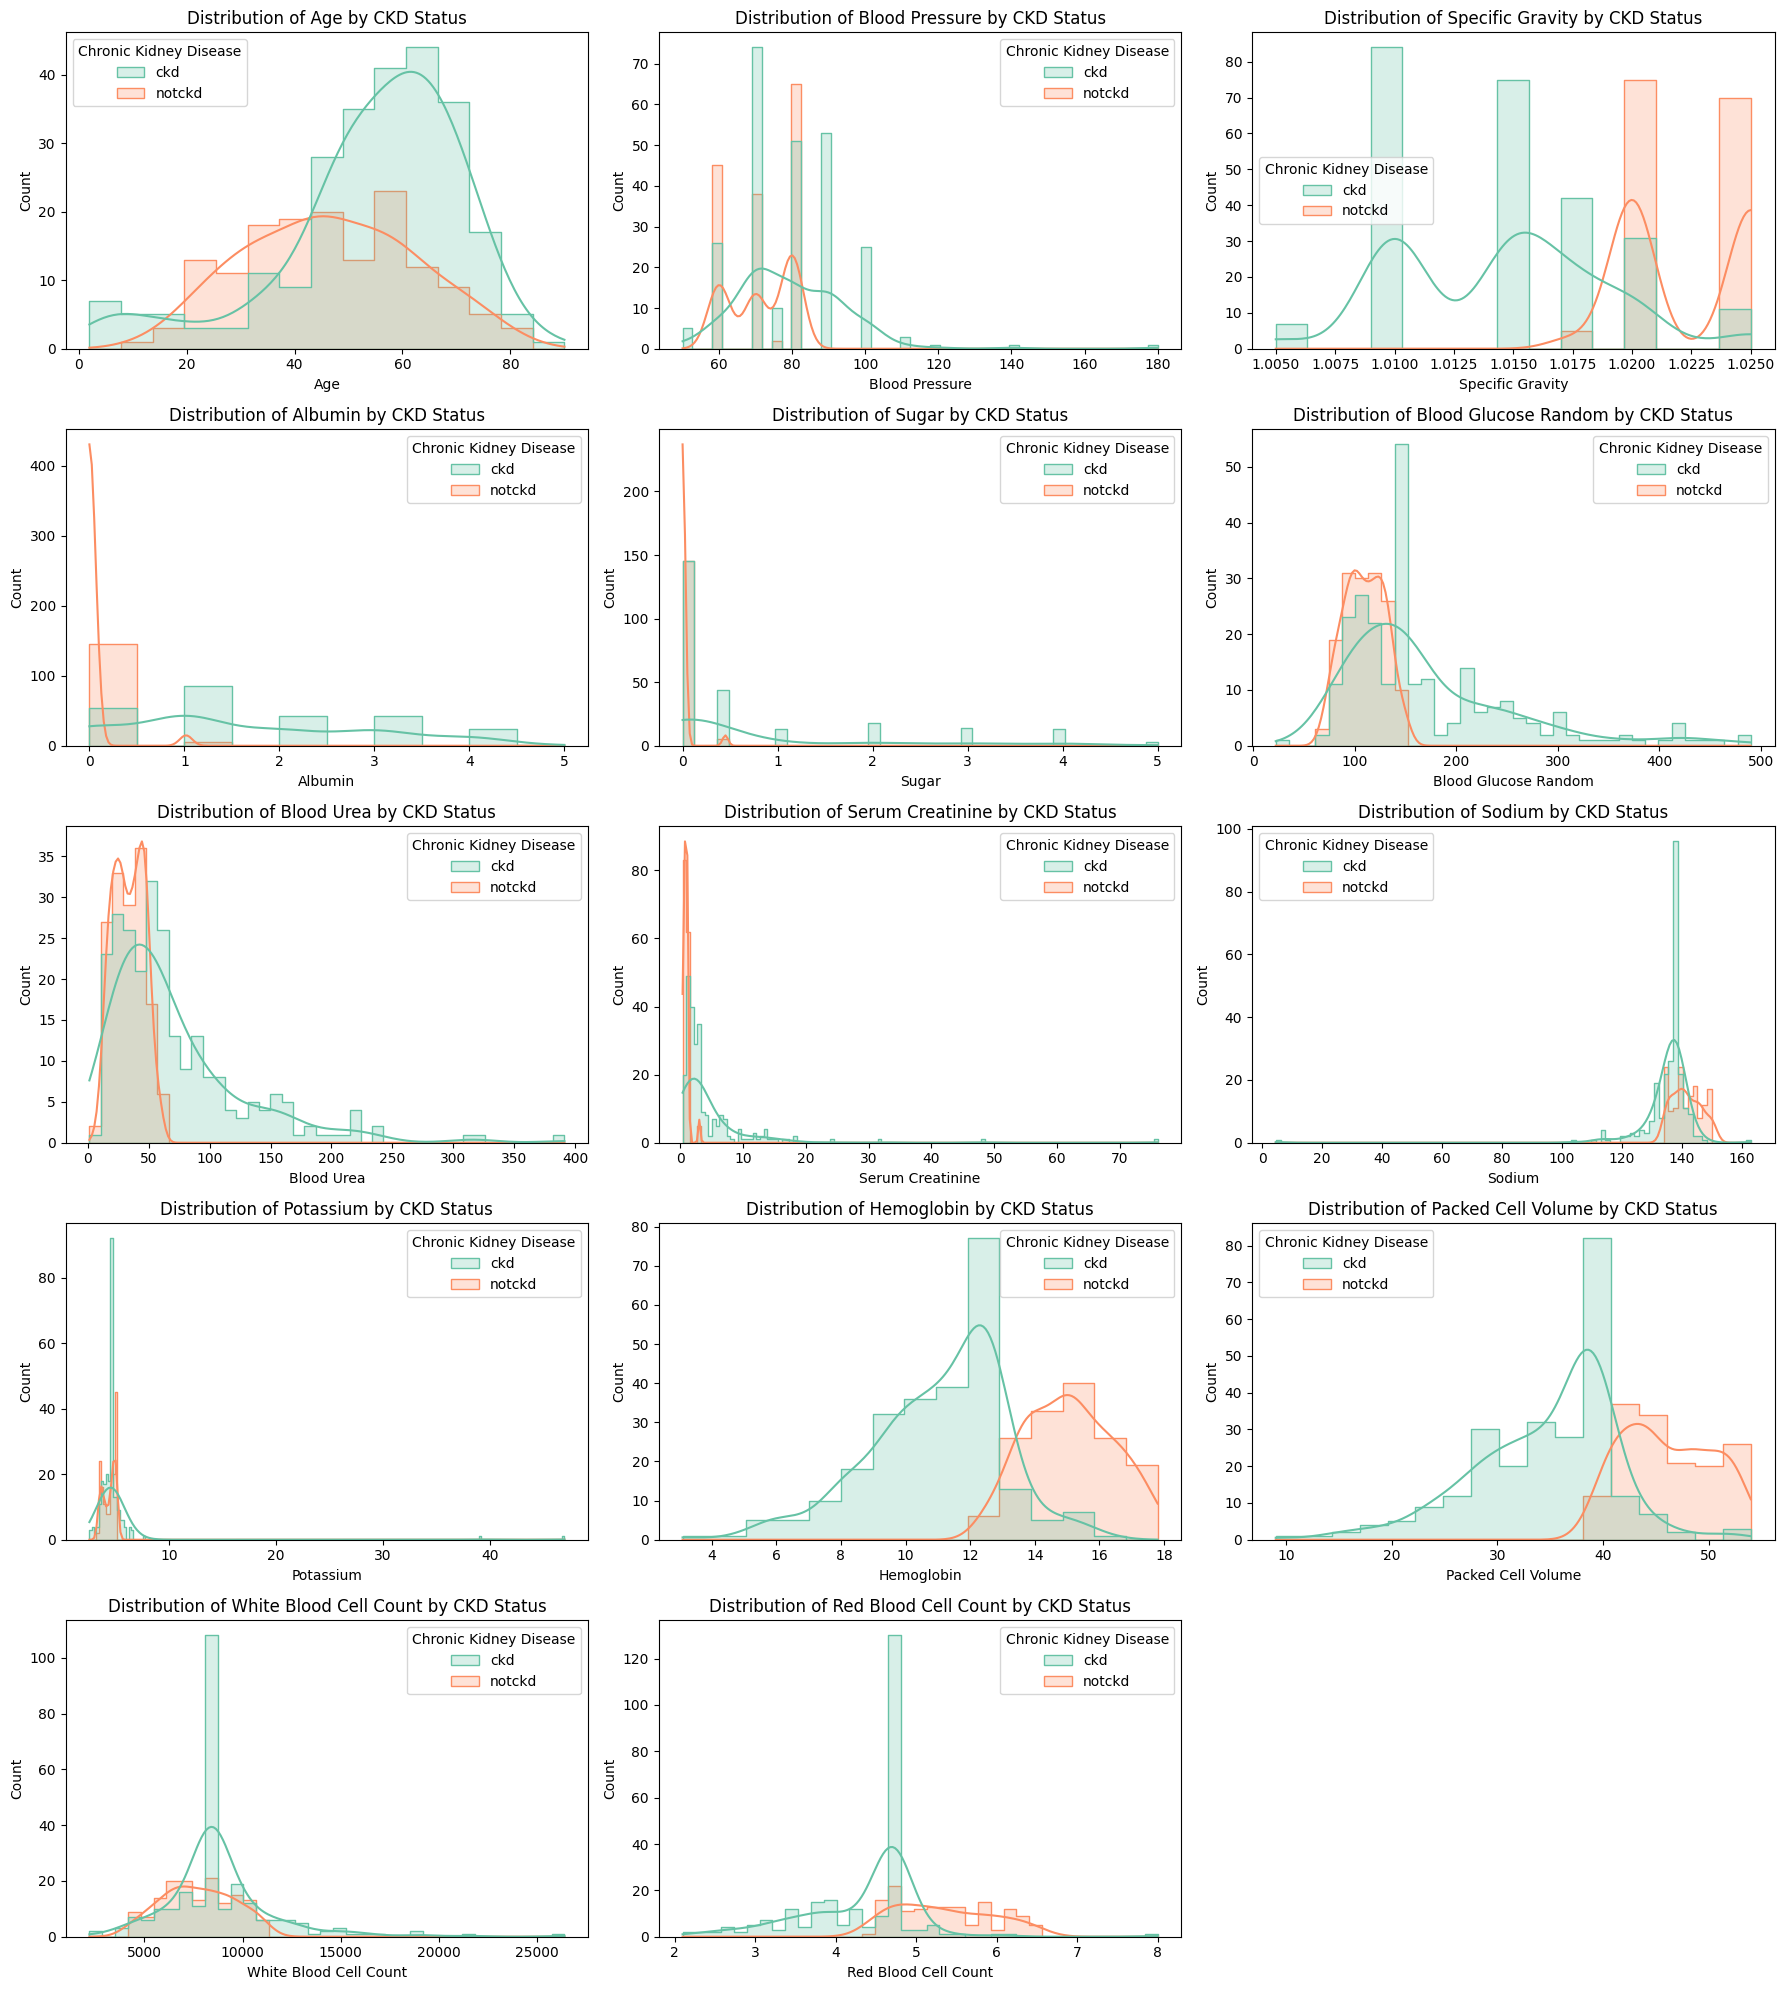

In [13]:
# Extracting numerical columns
numerical_features = combined_data.select_dtypes(include=['int64', 'float64']).columns
num_features = len(numerical_features)

# Define the number of columns for the subplot grid
ncols = 3  # Adjust based on desired plots per row
nrows = math.ceil(num_features / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 4))
axes = axes.flatten()  # Flatten axes array for easier indexing

# Loop through each numerical feature and create a histogram in the corresponding subplot
for idx, col in enumerate(numerical_features):
    sns.histplot(data=combined_data, x=col, hue='Chronic Kidney Disease',
                 kde=True, element="step", palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} by CKD Status')

# Remove any empty subplots if the number of features doesn't fill the grid
if num_features < len(axes):
    for idx in range(num_features, len(axes)):
        fig.delaxes(axes[idx])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


# Label Encoding

In [14]:
# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
categorical_cols = combined_data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

combined_data.head(20)


,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.000000,1.020000,1.000000,0.000000,1,1,0,0,121.000000,...,44.000000,7800.000000,5.200000,1,1,0,0,0,0,0
1,7.0,50.000000,1.020000,4.000000,0.000000,1,1,0,0,148.036517,...,38.000000,6000.000000,4.707435,0,0,0,0,0,0,0
2,62.0,80.000000,1.010000,2.000000,3.000000,1,1,0,0,423.000000,...,31.000000,7500.000000,4.707435,0,1,0,1,0,1,0
3,48.0,70.000000,1.005000,4.000000,0.000000,1,0,1,0,117.000000,...,32.000000,6700.000000,3.900000,1,0,0,1,1,1,0
4,51.0,80.000000,1.010000,2.000000,0.000000,1,1,0,0,106.000000,...,35.000000,7300.000000,4.600000,0,0,0,0,0,0,0
5,60.0,90.000000,1.015000,3.000000,0.000000,1,1,0,0,74.000000,...,39.000000,7800.000000,4.400000,1,1,0,0,1,0,0
6,68.0,70.000000,1.010000,0.000000,0.000000,1,1,0,0,100.000000,...,36.000000,8406.122449,4.707435,0,0,0,0,0,0,0
7,24.0,76.469072,1.015000,2.000000,4.000000,1,0,0,0,410.000000,...,44.000000,6900.000000,5.000000,0,1,0,0,1,0,0
8,52.0,100.000000,1.015000,3.000000,0.000000,1,0,1,0,138.000000,...,33.000000,9600.000000,4.000000,1,1,0,0,0,1,0
9,53.0,90.000000,1.020000,2.000000,0.000000,0,0,1,0,70.000000,...,29.000000,12100.000000,3.700000,1,1,0,1,0,1,0


# ReleationShip Among Features

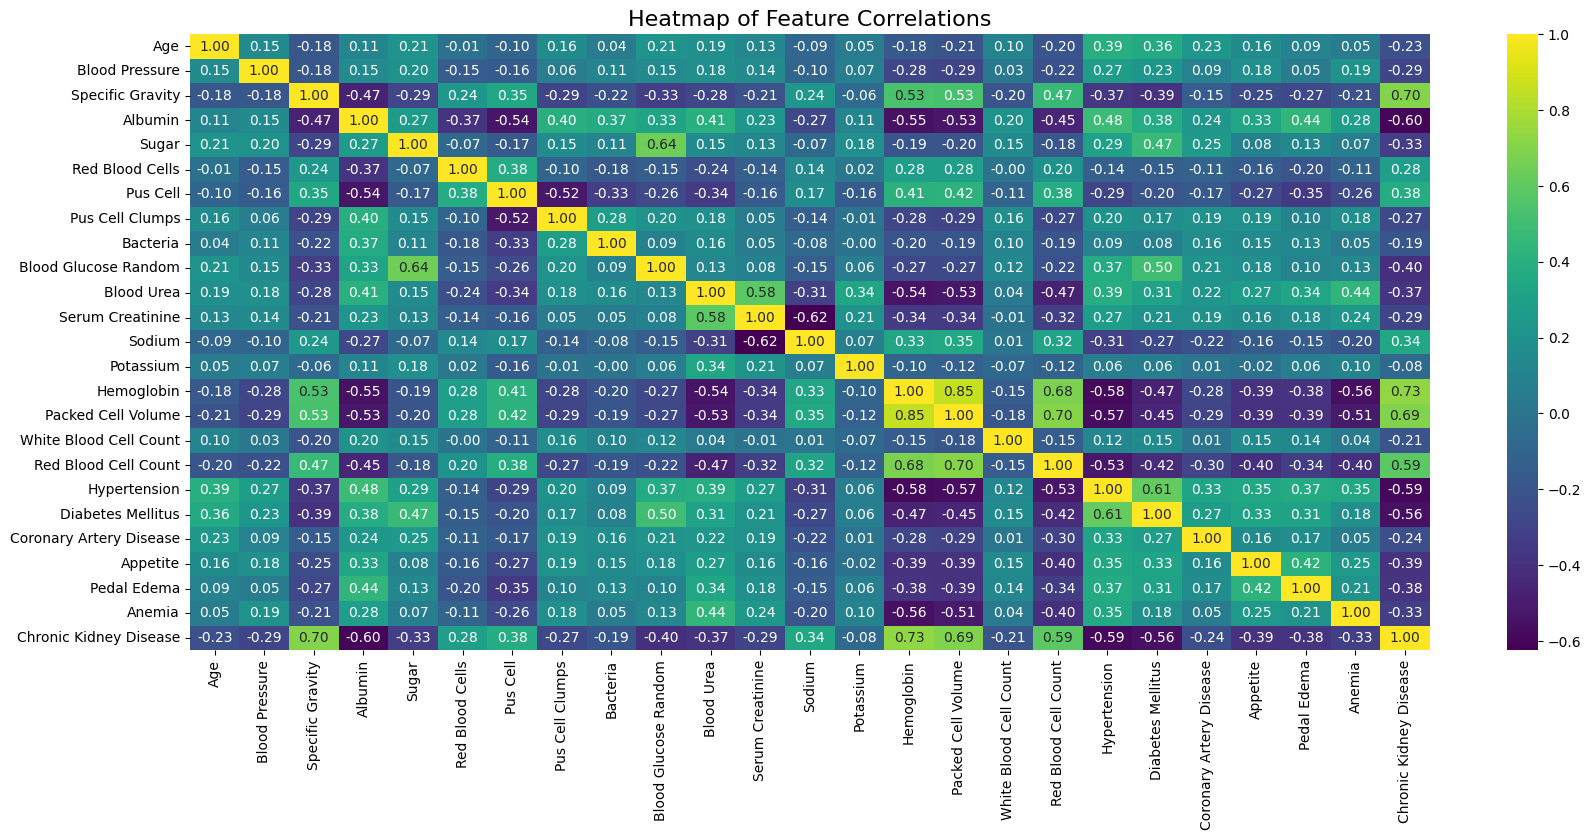

In [15]:
# Compute the correlation matrix
correlation_matrix = combined_data.corr()

# Create a heatmap with a different color scheme (using 'viridis')
plt.figure(figsize=(20, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', cbar=True)

# Add a title to the heatmap
plt.title('Heatmap of Feature Correlations', fontsize=16)

# Display the heatmap
plt.show()


# Extracting Most Important Features

**Using Correleation Method**

In [16]:
# Calculate correlation of all features with the target variable
correlation_with_target = combined_data.corr()['Chronic Kidney Disease'].abs()

# Drop the target variable itself from the correlation
correlation_with_target = correlation_with_target.drop('Chronic Kidney Disease')

# Select the 8 features with the highest correlation
top_8_features_corr = correlation_with_target.sort_values(ascending=False).head(8)
print("Top 8 features based on correlation:")
print(top_8_features_corr)


Top 8 features based on correlation:
Hemoglobin              0.729628
Specific Gravity        0.698957
Packed Cell Volume      0.690060
Albumin                 0.599238
Red Blood Cell Count    0.590913
Hypertension            0.590438
Diabetes Mellitus       0.559060
Blood Glucose Random    0.401374
Name: Chronic Kidney Disease, dtype: float64


In [17]:
# List of selected feature names
selected_features = [
    'Hemoglobin',
    'Specific Gravity',
    'Packed Cell Volume',
    'Albumin',
    'Red Blood Cell Count',
    'Hypertension',
    'Diabetes Mellitus',
    'Sodium',
    'Serum Creatinine'
]

# Extract the features and target variable
X = combined_data[selected_features]  # Feature set
y = combined_data['Chronic Kidney Disease']  # Target variable

# Verify the extracted data
print("Shape of feature set (X):", X.shape)
print("Shape of target variable (y):", y.shape)


Shape of feature set (X): (400, 9)
Shape of target variable (y): (400,)


# Separating Dataset for Training and Testing



In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify the shapes of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (320, 9)
Shape of X_test: (80, 9)
Shape of y_train: (320,)
Shape of y_test: (80,)


# Data Normalization

In [19]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Verify normalization
print("First 5 rows of normalized training data:\n", X_train_normalized[:5])
print("First 5 rows of normalized testing data:\n", X_test_normalized[:5])

First 5 rows of normalized training data:
 [[0.80769231 0.75       1.         0.         0.47457627 0.
  0.         0.59322034 0.01467505]
 [0.41538462 0.5        0.4        0.6        0.22033898 1.
  1.         0.45762712 0.19496855]
 [0.55384615 0.5        0.575      0.         0.40677966 1.
  1.         0.54237288 0.0754717 ]
 [0.98461538 1.         0.925      0.         0.49152542 0.
  0.         0.69491525 0.00209644]
 [0.99230769 0.75       0.8        0.         0.57627119 0.
  0.         0.6440678  0.01677149]]
First 5 rows of normalized testing data:
 [[0.46923077 0.6203966  0.525      0.20338983 0.05084746 1.
  1.         0.72881356 0.03563941]
 [0.22307692 0.5        0.25       0.4        0.18644068 1.
  1.         0.52542373 0.07337526]
 [0.76923077 0.75       0.8        0.         0.57627119 0.
  0.         0.72881356 0.01677149]
 [0.93846154 0.75       0.9        0.         0.6779661  0.
  0.         0.56828397 0.01467505]
 [0.65384615 0.75       0.85       0.         0.47

# Applying SVM Model

In [20]:
# Define hyperparameter grids for each classifier
svm_params = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    # Parameters below are relevant when kernel is 'poly'
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.1, 0.5, 1.0]
}
# Create a dictionary with classifier and its corresponding hyperparameter grids
classifier = {
    'SVM': (SVC(), svm_params)
}

In [21]:
best_scores = {}  # Dictionary to store the best scores of each algorithm
best_estimators = {}

# Perform RandomizedSearchCV for each classifier
for name, (classifier, params) in classifier.items():
    clf_random = RandomizedSearchCV(estimator=classifier, param_distributions=params, n_iter=50, cv=5, scoring='accuracy', random_state=42)
    clf_random.fit(X_train_normalized, y_train)

    print(f"Best parameters for {name}: {clf_random.best_params_}")
    print(f"Best cross-validation score for {name}: {clf_random.best_score_:.4f}")
    print('\n')

    # Store the best score for each algorithm
    best_scores[name] = clf_random.best_score_
    best_estimators[name] = clf_random.best_estimator_

# Print and save the accuracy of the best model from each algorithm
for name, score in best_scores.items():
    print(f"Best cross-validation score for {name}: {score:.4f}")

results_df = pd.DataFrame(clf_random.cv_results_)
print(results_df[['params', 'mean_test_score', 'std_test_score']].head(50))

Best parameters for SVM: {'kernel': 'rbf', 'gamma': 1, 'degree': 5, 'coef0': 0.5, 'C': 10}
Best cross-validation score for SVM: 0.9906


Best cross-validation score for SVM: 0.9906
                                               params  mean_test_score  \
0   {'kernel': 'poly', 'gamma': 'auto', 'degree': ...         0.987500   
1   {'kernel': 'rbf', 'gamma': 0.1, 'degree': 4, '...         0.981250   
2   {'kernel': 'rbf', 'gamma': 1, 'degree': 4, 'co...         0.984375   
3   {'kernel': 'rbf', 'gamma': 'auto', 'degree': 5...         0.978125   
4   {'kernel': 'linear', 'gamma': 'auto', 'degree'...         0.981250   
5   {'kernel': 'rbf', 'gamma': 0.1, 'degree': 5, '...         0.984375   
6   {'kernel': 'poly', 'gamma': 'auto', 'degree': ...         0.625000   
7   {'kernel': 'rbf', 'gamma': 1, 'degree': 4, 'co...         0.984375   
8   {'kernel': 'rbf', 'gamma': 0.01, 'degree': 3, ...         0.975000   
9   {'kernel': 'poly', 'gamma': 0.001, 'degree': 4...         0.625000   
10  {

# Evaluating SVM Model

Evaluation for SVM:
Confusion Matrix:
[[50  0]
 [ 2 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80





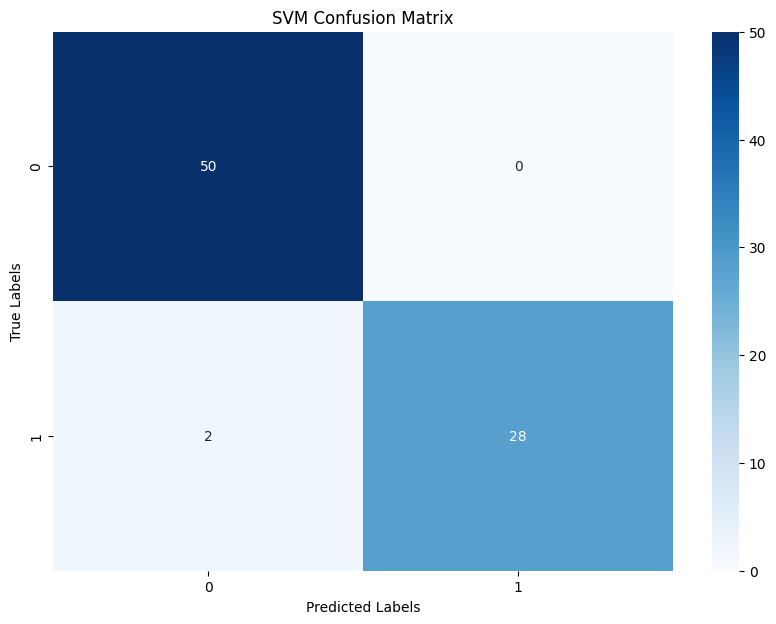

In [22]:
# Evaluate each best estimator on the test set
for name, estimator in best_estimators.items():
    # Predict on the test set using scaled features
    y_pred = estimator.predict(X_test_normalized)

    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    print(f"Evaluation for {name}:")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)
    print('\n')

    # Visualize the confusion matrix for the current estimator
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=True, yticklabels=True)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
